In [1]:
import pandas as pd

In [4]:
# Load test data
test_data = pd.read_csv('test.tsv', sep='\t')

In [5]:
print(test_data.head())

   Unnamed: 0                                              title  \
0        8104  Conservatives Will HATE What Donald Trump Just...   
1        7467  Trump victory may create new tension between U...   
2        9473  WATCH: Hundreds of ILLEGAL ALIENS Storm Senate...   
3         276  Democratic Senator Franken to resign: CNN, cit...   
4       19274  GANG OF DOMESTIC TERRORISTS Violently Attack L...   

                                                text       subject  \
0  Donald Trump isn t exactly a stranger to makin...          News   
1  Donald Trump’s U.S. election victory may creat...  politicsNews   
2  A couple of quick questions come to mind when ...      politics   
3  U.S. Democratic Senator Al Franken will announ...  politicsNews   
4  ***WARNING*** Violence is graphic***This Trump...     left-news   

                date  label  
0  February 14, 2016      0  
1  November 9, 2016       1  
2        Nov 9, 2017      0  
3  December 7, 2017       1  
4       Jan 21, 2017

In [6]:
print(test_data.isnull().sum())

Unnamed: 0    0
title         0
text          0
subject       0
date          0
label         0
dtype: int64


In [7]:
test_data_cleaned = test_data.drop(columns=['Unnamed: 0'])

In [8]:
test_data_cleaned['date'] = pd.to_datetime(test_data_cleaned['date'], errors='coerce')

In [9]:
test_data_cleaned = test_data_cleaned.dropna(subset=['date'])

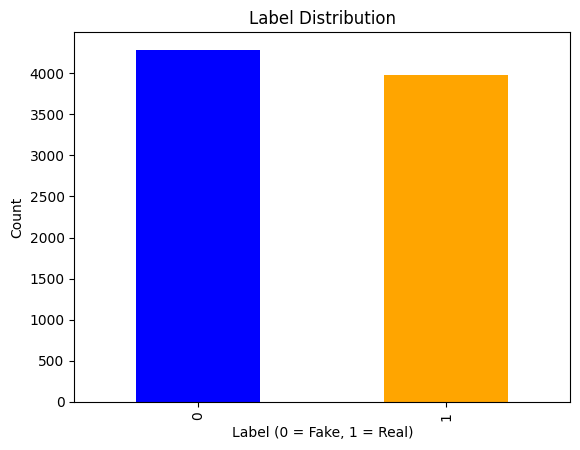

In [24]:
import matplotlib.pyplot as plt

# Label distribution
label_counts = test_data['label'].value_counts()
label_counts.plot(kind='bar', title='Label Distribution', color=['blue', 'orange'])
plt.xlabel('Label (0 = Fake, 1 = Real)')
plt.ylabel('Count')
plt.show()

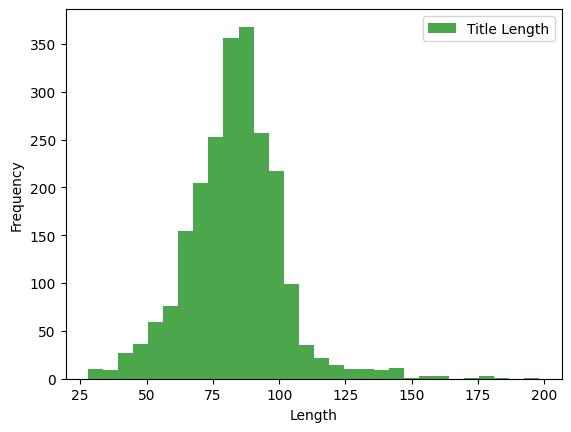

In [22]:
# Title length analysis
test_data_cleaned['title_length'] = test_data_cleaned['title'].apply(len)

plt.hist(test_data_cleaned['title_length'], bins=30, alpha=0.7, color='green', label='Title Length')
plt.legend()
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

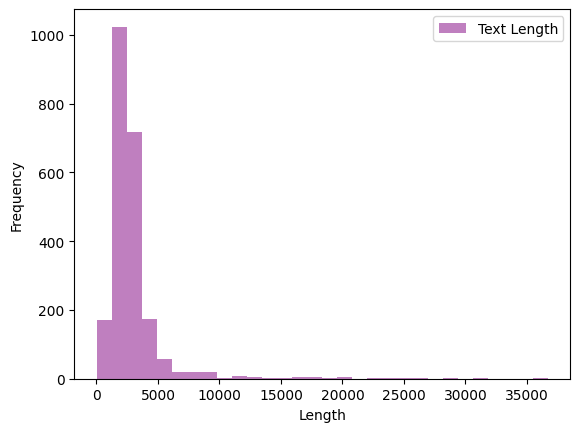

In [21]:
# Text length analysis
test_data_cleaned['text_length'] = test_data_cleaned['text'].apply(len)


plt.hist(test_data_cleaned['text_length'], bins=30, alpha=0.5, color='purple', label='Text Length')
plt.legend()
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize 'title' and 'text'
tfidf_title = TfidfVectorizer(max_features=5000)
tfidf_text = TfidfVectorizer(max_features=5000)

title_features = tfidf_title.fit_transform(test_data['title'])
text_features = tfidf_text.fit_transform(test_data['text'])

from scipy.sparse import hstack
combined_features = hstack([title_features, text_features])


In [45]:
from sklearn.model_selection import train_test_split

y = test_data['label']

X_train, X_test, y_train, y_test = train_test_split(combined_features, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Accuracy: 0.9782345828295043
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       841
           1       0.97      0.99      0.98       813

    accuracy                           0.98      1654
   macro avg       0.98      0.98      0.98      1654
weighted avg       0.98      0.98      0.98      1654

ROC-AUC Score: 0.9976496673409064


In [43]:
import joblib

joblib.dump(model, 'fake_news_classifier.pkl')

['fake_news_classifier.pkl']